# Logistic Regression on Titanic Dataset

This notebook is an attempt to improve upon the results obtained by applying logistic regression on the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). The base reference for the code that follows is contained in the Logistic Regression with Python notebook available in the [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) course by [Udemy](https://www.udemy.com/).

Note that we will use a "semi-cleaned" version of the titanic data set.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Train and Test Data

In [2]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print('Average survival rate:', round(train['Survived'].mean(), 4))
print('Average age:', round(train['Age'].mean(), 2))

Average survival rate: 0.3838
Average age: 29.7


- We can see that roughly 40% of the passengers survived the sinking of the Titanic.
- The average age of all the passengers was around 30.

In [6]:
test = pd.read_csv('titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

### Missing Data

<AxesSubplot:>

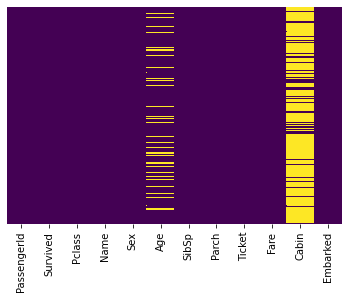

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

We observe that some values are missing in the 'Age' column. However, most of the values are missing in the 'Cabin' column. We will explore these columns further later on in the following ways:

- Imputing missing values for 'Age' with the median age values for each passenger class.
- Exploring the letter with which 'Cabin' starts for rows which contain information about the cabin.

For now, let's create some plots to understand the data better.

### Data Visualisation

In [8]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

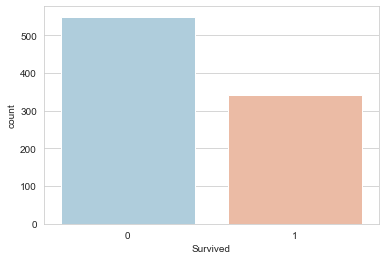

In [9]:
sns.countplot(x='Survived',data=train,palette='RdBu_r')

From the train set, roughly 550 passengers did not survive the crash while around 350 passengers did.

<AxesSubplot:xlabel='Survived', ylabel='count'>

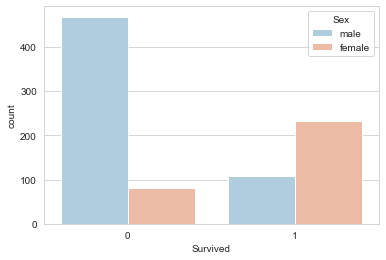

In [10]:
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

- Almost 5 times as many males did not survive the crash as compared to females.
- More than twice as many females survived the crash as compared to males.

<AxesSubplot:xlabel='Survived', ylabel='count'>

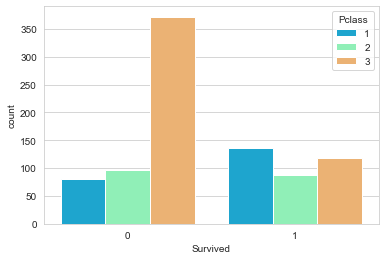

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

- Most of the passengers who did not survive the crash belonged to passenger class 3.
- Most of the passengers who survived the crash belonged to passenger class 1.

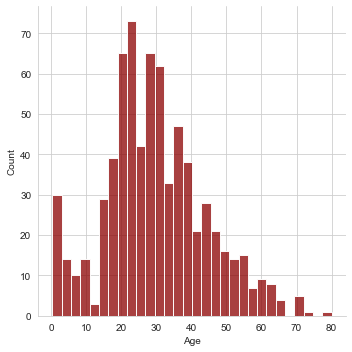

In [12]:
sns.displot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

# Alternate
# train['Age'].hist(bins=30,color='darkred',alpha=0.7)

- Most of the passengers were in the 20-30 age group.
- Another interesting observation is that there was a large number of infants (of age less than a year).

<AxesSubplot:xlabel='SibSp', ylabel='count'>

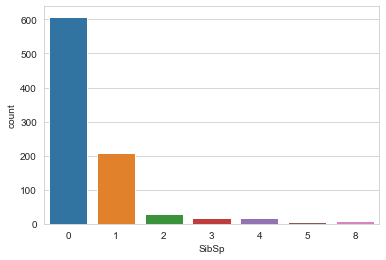

In [13]:
sns.countplot(x='SibSp',data=train)

A large proportion of the passengers had no sibling or spouse.

<AxesSubplot:xlabel='Parch', ylabel='count'>

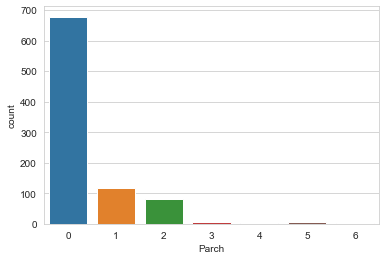

In [14]:
sns.countplot(x='Parch',data=train)

Similarly, a large proportion of the passengers had no parent or child.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

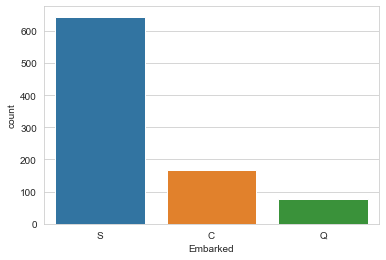

In [15]:
sns.countplot(x='Embarked',data=train)

Most of the people embarked from the Southampton port.

In [16]:
import cufflinks as cf
cf.go_offline()

In [17]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

Most of the passengers had paid a fare between \\$0 and \\$30.

## Data Cleaning on Train Set

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

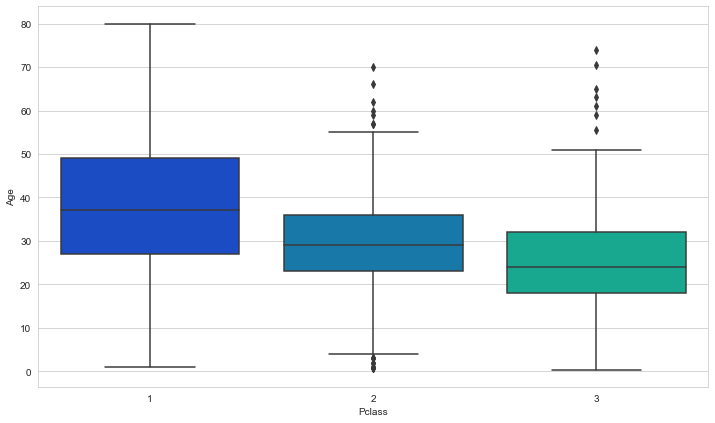

In [18]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see that the median age decreases with passenger class. Generally, older people were in a higher class.

Let's now determine the exact median age values for each passenger class.

In [19]:
train.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [20]:
train.groupby('Pclass')['Age'].describe()['50%']

Pclass
1    37.0
2    29.0
3    24.0
Name: 50%, dtype: float64

We shall define and apply a function to impute missing age values with the corresponding median values for each class.

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [22]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

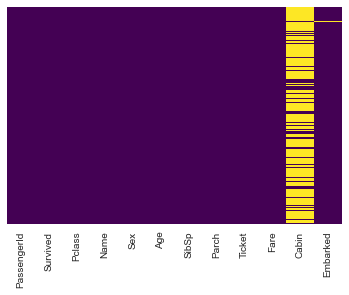

In [23]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see that there are no more null values in the 'Age' column.
Let's drop the very few row(s) that contain null values in the 'Embarked' column. 

In [24]:
train.dropna(subset=['Embarked'], inplace=True)

<AxesSubplot:>

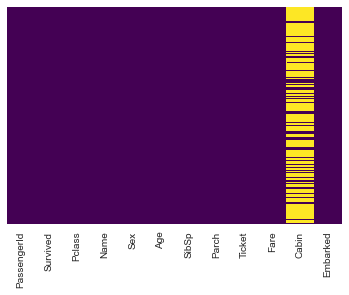

In [25]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Data Cleaning on Test Set

Let's impute the missing age values on the test set as well.

<AxesSubplot:>

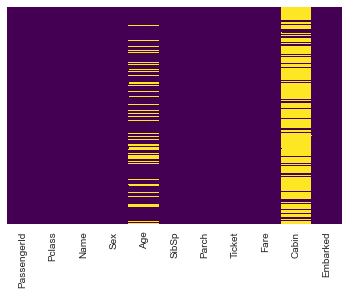

In [26]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
test.groupby('Pclass')['Age'].describe()['50%']

Pclass
1    42.0
2    26.5
3    24.0
Name: 50%, dtype: float64

In [28]:
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 24

    else:
        return Age

In [29]:
# Impute missing age values
test['Age'] = test[['Age','Pclass']].apply(impute_age_test,axis=1)

<AxesSubplot:>

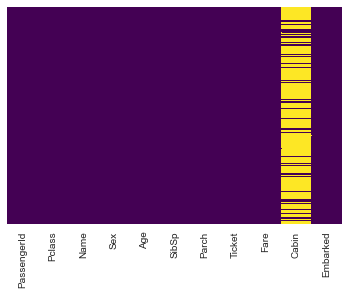

In [30]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Feature Engineering on Train Set

It is time to create some more features out of the existing ones to see if they can enable us to make better predictions. We shall create the following mappings:

- Sex = 'male' or 'female' => male = 1 or 0 respectively
- Embarked = 'S', 'Q' or 'C' => (Q,S) = (0,1), (1,0) or (0,0) respectively
- Pclass = '1' or '2' or '3' => (2,3) = (0,0), (1,0) or (0,1) respectively [Note that 2 and 3 in the LHS are passenger classes]

We shall also create the following features:
- Title (such as Mr., Dr. etc.)
- Cabin letter (the first letter of the cabin number)

### Encoding the 'Sex' Feature

In [31]:
sex = pd.get_dummies(train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Note that we can encode both male and female values using only the 'male' column. Hence, we can drop the 'female' column here.

In [32]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


### Encoding the 'Embarked' Feature

In [33]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [34]:
# Renaming the columns for more readability
embark.rename(columns={'Q': 'embark_Queenstown', 'S': 'embark_Southampton'}, inplace=True)
embark.head()

,embark_Queenstown,embark_Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Encoding the 'Pclass' Feature

In [35]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [36]:
pclass.rename(columns={2: 'class_2', 3: 'class_3'}, inplace=True)
pclass.head()

,class_2,class_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


### Examining the 'Name' column

In [37]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 889, dtype: object

We can split the names by comma (,) to obtain the title in each name.

In [38]:
train['Name'].apply(lambda x: x.split(','))

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 889, dtype: object

In [39]:
train['Name'].apply(lambda x: x.split(',')[1])

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: Name, Length: 889, dtype: object

In [40]:
train['Name'].apply(lambda x: x.split(',')[1].split('.'))

0                                 [ Mr,  Owen Harris]
1      [ Mrs,  John Bradley (Florence Briggs Thayer)]
2                                     [ Miss,  Laina]
3              [ Mrs,  Jacques Heath (Lily May Peel)]
4                               [ Mr,  William Henry]
                            ...                      
886                                   [ Rev,  Juozas]
887                          [ Miss,  Margaret Edith]
888                [ Miss,  Catherine Helen "Carrie"]
889                               [ Mr,  Karl Howell]
890                                   [ Mr,  Patrick]
Name: Name, Length: 889, dtype: object

In [41]:
train['Name'].apply(lambda x: x.split(',')[1].split('.')[0])

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Name, Length: 889, dtype: object

### Creating a new feature 'Title'

In [42]:
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
train['Title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 889, dtype: object

In [43]:
train['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

Note that there is a space before each title. Let's go ahead and remove that.

In [44]:
train['Title'] = train['Title'].apply(lambda x: x.split()[0])
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 889, dtype: object

In [45]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the', 'Jonkheer'],
      dtype=object)

In [46]:
train['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
the           1
Capt          1
Jonkheer      1
Lady          1
Don           1
Sir           1
Ms            1
Mme           1
Name: Title, dtype: int64

Let's just consider the passengers with titles among the top four (Mr, Miss, Mrs, Master) as they are more significant in number. We shall set the rest of the titles to nan.

In [47]:
import math

In [48]:
def remove_other_titles(title):
    if title == 'Mr' or title == 'Miss' or title == 'Mrs' or title == 'Master':
        return title
    else:
        return 'NaN'

In [49]:
# Testing the function (1)
remove_other_titles(train['Title'][0])

'Mr'

In [50]:
# Testing the function (2)
remove_other_titles(train['Title'][886]) # Title was Rev here

'NaN'

In [51]:
train['Title'] = train['Title'].apply(remove_other_titles)
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     NaN
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 889, dtype: object

In [52]:
train['Title'].value_counts(dropna=False)

Mr        517
Miss      181
Mrs       124
Master     40
NaN        27
Name: Title, dtype: int64

This confirms that all the titles are assigned exactly as we intended to.

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Encoding the 'Title' Feature

In [54]:
title = pd.get_dummies(train['Title'], drop_first=True)
title.head()

,Miss,Mr,Mrs,NaN
0,0,1,0,0
1,0,0,1,0
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


### Extracting a Feature from 'Cabin'
Let's explore the 'Cabin' column a bit.

In [55]:
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [56]:
train['Cabin'].notna().value_counts()

False    687
True     202
Name: Cabin, dtype: int64

The 'Cabin' column has 687 null values in the train set, which is a huge number.

In [57]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'C83', 'F33', 'F G73',
       'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69',
       'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32',
       'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87',
       'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49',
       'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66',
       'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128',
       'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24',

In [58]:
train['Cabin'][0]

nan

In [59]:
np.isnan(train['Cabin'][0])

True

In [60]:
type(train['Cabin'][0])

float

Let's convert all the nan values from float to string. This will help us to extract the first letter from our nan values as well.

In [61]:
train['Cabin'] = train['Cabin'].replace(np.nan, 'NaN')
train['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

Now, let's extract the first letter from all cabin values and use this as a feature in our model.

In [62]:
train['CabinLetter'] = train['Cabin'].apply(lambda x: x[0])
train['CabinLetter'].head()

0    N
1    C
2    N
3    C
4    N
Name: CabinLetter, dtype: object

In [63]:
train['CabinLetter'].value_counts()

N    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: CabinLetter, dtype: int64

### Encoding the 'CabinLetter' feature

In [64]:
cabin = pd.get_dummies(train['CabinLetter'], drop_first=True)
cabin.head()

,B,C,D,E,F,G,N,T
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


In [65]:
cabin.rename(columns={'B': 'cabinletter_B',
                      'C': 'cabinletter_C',
                      'D': 'cabinletter_D',
                      'E': 'cabinletter_E',
                      'F': 'cabinletter_F',
                      'G': 'cabinletter_G',
                      'N': 'cabinletter_NA',
                      'T': 'cabinletter_T'
                     }, inplace=True)
cabin.head()

,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA,cabinletter_T
0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0


### Bringing It All Together

Now that we are done with feature extraction and encoding, let's remove the columns that we don't need anymore and add the newly encoded ones.

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,N


In [67]:
train.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'CabinLetter'],
           axis=1,
           inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [68]:
train = pd.concat([train, sex, embark, pclass, title, cabin],axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,embark_Queenstown,embark_Southampton,class_2,class_3,...,Mrs,NaN,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA,cabinletter_T
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [69]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male',
       'embark_Queenstown', 'embark_Southampton', 'class_2', 'class_3', 'Miss',
       'Mr', 'Mrs', 'NaN', 'cabinletter_B', 'cabinletter_C', 'cabinletter_D',
       'cabinletter_E', 'cabinletter_F', 'cabinletter_G', 'cabinletter_NA',
       'cabinletter_T'],
      dtype='object')

Our data now looks in good shape and we can finally use it for our model! Before doing so, we will need to get our test set as well in a similar form. Let's go about doing that.

## Feature Engineering on Test Set

In [70]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
# Let's extract the passenger id data from the test set. We will use this towards the end
test_passengerid = test['PassengerId']
test_passengerid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

### Encoding the 'Sex', 'Embarked' and 'Pclass' Features

In [72]:
sex_test = pd.get_dummies(test['Sex'], drop_first=True)
sex_test.head()

,male
0,1
1,0
2,1
3,1
4,0


In [73]:
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)
embark_test.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [74]:
embark_test.rename(columns={'Q': 'embark_Queenstown', 'S': 'embark_Southampton'}, inplace=True)
embark_test.head()

,embark_Queenstown,embark_Southampton
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [75]:
pclass_test = pd.get_dummies(test['Pclass'], drop_first=True)
pclass_test.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [76]:
pclass_test.rename(columns={2: 'class_2', 3: 'class_3'}, inplace=True)
pclass_test.head()

,class_2,class_3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


### Creating and Encoding the 'Title' Feature for Test Set

In [77]:
test['Name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [78]:
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0])
test['Title']

0           Mr
1          Mrs
2           Mr
3           Mr
4          Mrs
        ...   
413         Mr
414       Dona
415         Mr
416         Mr
417     Master
Name: Title, Length: 418, dtype: object

In [79]:
test['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [80]:
test['Title'] = test['Title'].apply(lambda x: x.split()[0])
test['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414      Dona
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [81]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [82]:
test['Title'] = test['Title'].apply(remove_other_titles)
test['Title']

0          Mr
1         Mrs
2          Mr
3          Mr
4         Mrs
        ...  
413        Mr
414       NaN
415        Mr
416        Mr
417    Master
Name: Title, Length: 418, dtype: object

In [83]:
test['Title'].value_counts(dropna=False)

Mr        240
Miss       78
Mrs        72
Master     21
NaN         7
Name: Title, dtype: int64

In [84]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [85]:
title_test = pd.get_dummies(test['Title'], drop_first=True)
title_test.head()

,Miss,Mr,Mrs,NaN
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,1,0


### Creating and Encoding the 'Cabin' Feature for Test Set

In [86]:
test['Cabin']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 418, dtype: object

In [87]:
test['Cabin'] = test['Cabin'].replace(np.nan, 'NaN')
test['Cabin'].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Cabin, dtype: object

In [88]:
test['CabinLetter'] = test['Cabin'].apply(lambda x: x[0])
test['CabinLetter'].head()

0    N
1    N
2    N
3    N
4    N
Name: CabinLetter, dtype: object

In [89]:
test['CabinLetter'].value_counts()

N    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: CabinLetter, dtype: int64

In [90]:
cabin_test = pd.get_dummies(test['CabinLetter'], drop_first=True)
cabin_test.head()

,B,C,D,E,F,G,N
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [91]:
cabin_test.rename(columns={'B': 'cabinletter_B',
                      'C': 'cabinletter_C',
                      'D': 'cabinletter_D',
                      'E': 'cabinletter_E',
                      'F': 'cabinletter_F',
                      'G': 'cabinletter_G',
                      'N': 'cabinletter_NA',
                      'T': 'cabinletter_T'
                     }, inplace=True)
cabin_test.head()

,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


### Bringing It All Together

In [92]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,CabinLetter
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr,N
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs,N
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr,N
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr,N
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs,N


In [93]:
test.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Title', 'CabinLetter'],
           axis=1,
           inplace=True)
test.head()

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875


In [94]:
test = pd.concat([test, sex_test, embark_test, pclass_test, title_test, cabin_test],axis=1)
test.head()

,Age,SibSp,Parch,Fare,male,embark_Queenstown,embark_Southampton,class_2,class_3,Miss,Mr,Mrs,NaN,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA
0,34.5,0,0,7.8292,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,62.0,0,0,9.6875,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,27.0,0,0,8.6625,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1


In [95]:
test.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'male', 'embark_Queenstown',
       'embark_Southampton', 'class_2', 'class_3', 'Miss', 'Mr', 'Mrs', 'NaN',
       'cabinletter_B', 'cabinletter_C', 'cabinletter_D', 'cabinletter_E',
       'cabinletter_F', 'cabinletter_G', 'cabinletter_NA'],
      dtype='object')

In [96]:
train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male',
       'embark_Queenstown', 'embark_Southampton', 'class_2', 'class_3', 'Miss',
       'Mr', 'Mrs', 'NaN', 'cabinletter_B', 'cabinletter_C', 'cabinletter_D',
       'cabinletter_E', 'cabinletter_F', 'cabinletter_G', 'cabinletter_NA',
       'cabinletter_T'],
      dtype='object')

Our test set looks in good shape now. Let's drop the 'cabinletter_T' column from the train set to bring both the train and test sets in the same shape. The only additional column that the train set will have is 'Survived' which will be our y_train.

In [97]:
train.drop('cabinletter_T', axis=1, inplace=True)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,embark_Queenstown,embark_Southampton,class_2,class_3,...,Mr,Mrs,NaN,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA
0,0,22.0,1,0,7.2500,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


## Building a Logistic Regression model

### Identifying the Train and Test Sets

In [98]:
X_train = train.drop('Survived', axis=1)
X_train.head()

,Age,SibSp,Parch,Fare,male,embark_Queenstown,embark_Southampton,class_2,class_3,Miss,Mr,Mrs,NaN,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA
0,22.0,1,0,7.2500,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
1,38.0,1,0,71.2833,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,35.0,0,0,8.0500,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1


In [99]:
y_train = train['Survived']
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [100]:
X_test = test
X_test.head()

,Age,SibSp,Parch,Fare,male,embark_Queenstown,embark_Southampton,class_2,class_3,Miss,Mr,Mrs,NaN,cabinletter_B,cabinletter_C,cabinletter_D,cabinletter_E,cabinletter_F,cabinletter_G,cabinletter_NA
0,34.5,0,0,7.8292,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
2,62.0,0,0,9.6875,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,27.0,0,0,8.6625,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1


### Training and Predicting

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [103]:
X_test.isnull().sum()

Age                   0
SibSp                 0
Parch                 0
Fare                  1
male                  0
embark_Queenstown     0
embark_Southampton    0
class_2               0
class_3               0
Miss                  0
Mr                    0
Mrs                   0
NaN                   0
cabinletter_B         0
cabinletter_C         0
cabinletter_D         0
cabinletter_E         0
cabinletter_F         0
cabinletter_G         0
cabinletter_NA        0
dtype: int64

There is a null value in the 'Fare' column for a row. Let's replace it with the average fare amount.

In [104]:
X_test['Fare'].mean()

35.6271884892086

In [105]:
# Look for the index with the missing 'Fare' value
X_test[X_test['Fare'].isnull()].index.tolist()

[152]

In [106]:
# Replace the missing value with the average fare amount
X_test['Fare'][152] = 35.6272
X_test['Fare'][152]

35.6272

In [107]:
predictions = logmodel.predict(X_test)

### Evaluation

Now our model will be evaluated by comparing the predictions with the actual values for the 'Survived' column from the test set. The latter is internally available in Kaggle, so we will submit our solution to obtain the required metrics. Let's get our predictions in the required format.

In [108]:
predictions_df = pd.DataFrame(data=predictions, columns=['Survived'])
predictions_df

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [109]:
# Concatenating passenger id data to the predictions df
predictions_df = pd.concat([test_passengerid, predictions_df], axis=1)
predictions_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [110]:
# Converting the above dataframe to a CSV format
# The file path will vary from one system to another
predictions_df.to_csv(
    path_or_buf='C:\\Users\\neera\\Downloads\\Python for Data Science and Machine Learning Bootcamp\\13-Logistic-Regression\\titanic_submission.csv',
    index=False
)

We obtain the following score on Kaggle.

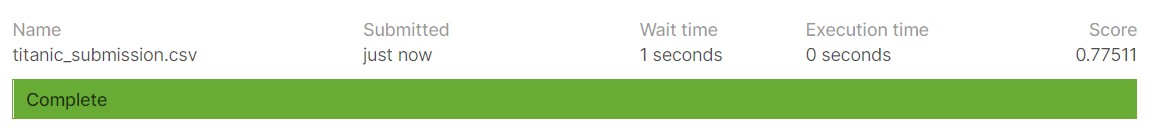

## Conclusion

The score looks okayish and leaves room for further improvement either by extracting some more useful features or using some other model that will fit the data better and make more accurate predictions.

That's it for now. Any suggestions and feedback are most welcome!